# Pandas 모듈
- Series Class : 1차원(인덱스 + 값)
- DataFrame Class : 2차원(표와같은 형태)(쉽게말해 series가 모여 있는것!)

In [209]:
#판다스 불러오기!
import pandas as pd

In [210]:
#Pandas 의 Series 생성
series1 = pd.Series([1,2,3,4,5])
series1 #인덱스는 따로 지정해 주지 않으면 0부터 시작하는 정수의 값이 들어간다.

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [211]:
#인덱스 지정해서 Series 생성
series2 = pd.Series([1,2,3,4,5], index = ['일','이','삼','사','오'])
series2

일    1
이    2
삼    3
사    4
오    5
dtype: int64

In [212]:
population = pd.Series([9904312,3448737,2890451,2466052],
                       index = ['서울','부산','인천','대구'])
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
dtype: int64

In [213]:
#Series 정보확인
#값, 인덱스, 타입 확인가능
#values, index, dtype
print(population.values) #값 확인
print(population.index) #인덱스 확인
print(population.dtype) #타입 확인

[9904312 3448737 2890451 2466052]
Index(['서울', '부산', '인천', '대구'], dtype='object')
int64


In [214]:
# Series의 컬럼 이름 지정
population.name = '인구'
population

서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [215]:
#인덱스에 이름 지정해주기
population.index.name = '도시'
population

도시
서울    9904312
부산    3448737
인천    2890451
대구    2466052
Name: 인구, dtype: int64

In [216]:
#시리즈 연산
population /1000000 #데이터 전체에 대해 value값이 연산이 된다.

도시
서울    9.904312
부산    3.448737
인천    2.890451
대구    2.466052
Name: 인구, dtype: float64

In [217]:
#시리즈 인덱싱
population[1] #인덱스 번호를 통한 인덱싱
population['부산'] #인덱스에 부여한 이름을 통한 인덱싱

3448737

In [218]:
#리스트를 활용한 인덱싱
population[['서울','부산']] #인덱싱 안에 리스트를 생성하여 그 리스트에 적은 순서대로 출력된다.
print(type(['서울','부산'])) #변수에 안담아도 []로 리스트를 선언했기 때문에 리스트이다! 
population[[0,3,1]] #인덱스 번호로도 가능

<class 'list'>


도시
서울    9904312
대구    2466052
부산    3448737
Name: 인구, dtype: int64

In [219]:
#boolean 인덱싱
#인구수가 250만 이상인 도시의 정보 출력
population[population >= 2500000]

도시
서울    9904312
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [220]:
#인구수가 500만 이하의 도시 정보 출력
name1 = population[population<= 5000000]

In [221]:
#인구수가 250만 이상이고 500만이하의 도시 정보 출력
name1[population >2500000]
population[(population >= 2500000)&(population <= 5000000)] #판다스에서는 and를 인식못해서 기호로 바꾸어야 한다! #계산을 1번하는것!(상대적 효율이 높다.)
population[population<=5000000][population>=2500000] #boolean 인덱싱을 두번한것!(numpuy에서 헷갈렸던거!) #계산을 2번하는것!(상대적 효율이 낮다.)

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [222]:
#시리즈 슬라이싱
print(population[1:3]) #인덱스 번호로 슬라이싱 -> [첫번째 수 : 끝 수 +1]
population['부산' : '인천'] #지정한 인덱스 이름으로 슬라이싱 -> [첫번째 값 : 끝나는 값]

도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64


도시
부산    3448737
인천    2890451
Name: 인구, dtype: int64

In [223]:
#딕셔너리 객체로 시리즈 생성
#인덱스 부여가 자동으로 완성
#key = 인덱스
#value = 값
data = {'서울' : 9631482, '부산' : 3393191, '인천' : 2632035, '대전' : 1490158}
data
population2 = pd.Series(data)
population2.name = '인구'
population2.index.name = '도시'
population2

도시
서울    9631482
부산    3393191
인천    2632035
대전    1490158
Name: 인구, dtype: int64

In [224]:
#population2 : 2010년 인구
#population : 2015년 인구
#2010년도와 2015년의 인구 증가를 계산
ds = population - population2 
#시리즈에서는 인덱스 값을 지정한 경우 각각의 인덱스가 맞아야지만 연산이 된다.(nan = not a number)
#인덱스의 순서에 상관없이 인덱스가 같으면 연산이 진행된다.

In [225]:
#null 값 알아보기
#notnull() : null이 아니면 True, null 이면 False -> null이 없는 값들만 출력하고 싶을 때!
#isnull() : null이 아니면 False, null 이면 True -> null 값들만 출력하고 싶을 때!
ds[ds.notnull()]

도시
부산     55546.0
서울    272830.0
인천    258416.0
Name: 인구, dtype: float64

In [226]:
#2015년도와 2010년도의 인구 증가율 계산
#단, 없는 값은 출력x
#(2015년 인구 - 2010년 인구) / 2010년 인구 *100
ds1 = ds/population2 * 100
ds1[ds1.notnull()]
# ds[(ds/population2 *100).notnull()]

도시
부산    1.636984
서울    2.832690
인천    9.818107
Name: 인구, dtype: float64

In [227]:
#시리즈값 갱신
ds1['대구'] = 1.41
ds1

도시
대구    1.410000
대전         NaN
부산    1.636984
서울    2.832690
인천    9.818107
Name: 인구, dtype: float64

In [228]:
#시리즈값 추가
ds1['광주'] = 2.08
ds1

도시
대구    1.410000
대전         NaN
부산    1.636984
서울    2.832690
인천    9.818107
광주    2.080000
Name: 인구, dtype: float64

In [229]:
#시리즈값 삭제
#del 사용한다
del ds1['대전']
ds1
#drop도 사용가능
# ds1.drop(index = '서울')

도시
대구    1.410000
부산    1.636984
서울    2.832690
인천    9.818107
광주    2.080000
Name: 인구, dtype: float64

# DataFrame

In [230]:
#딕셔너리를 통해서 DataFrame만들기 -> 값과 밸류값이 세로로 출력
data = {
    '2015' : [9904312, 3448737, 2890451, 2466052],
    '2010' : [9631482, 3393191, 2632035, 2431774]
}
df = pd.DataFrame(data)
df

,2015,2010
0,9904312,9631482
1,3448737,3393191
2,2890451,2632035
3,2466052,2431774


In [231]:
#DataFrame 을 만든후 인덱스 설정하기
df.index = ['서울', '부산', '인천', '대구']
# df.index.name = '도시'
df

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [232]:
#DataFrame 생성시 인덱스 지정, 컬럼 지정하기
data = [
    [9904312, 3448737, 2890451, 2466052],
    [9631482, 3393191, 2632035, 2431774]
] # -> 리스트 사용시 값과 밸류가 가로로 출력
ind = ['2015','2010'] #인덱스 이름
col = ['서울', '부산', '인천', '대구'] # 컬럼 이름

df2 = pd.DataFrame(data, index = ind, columns = col)
df2
#선생님 여기서 인덱스를 가져오고싶은데 일반적인 인덱싱은 안되고 슬라이싱만 되는데
#왜그런건가요?
# df2[0:1]
# df[0]

,서울,부산,인천,대구
2015,9904312,3448737,2890451,2466052
2010,9631482,3393191,2632035,2431774


In [233]:
# 데이터프레임에서 슬라이싱을 사용하면 인덱스 기준으로 슬라이싱하고
# 인덱싱을 사용하면 컬럼을 기준으로 인덱싱을 진행하게됩니다.
# 그래서 loc / iloc인덱서를 사용해야지만 원하는 값을 가져올 수 있으실거에요
#그럼 일반적인 인덱싱으로는 인덱스 값을 가져올수는 없는건가요?
# df['서울'] # 이렇게 가져올수 없습니다. 그래서 인덱서를 사용하는걸 추천드려요
#네 감사합니다! 넹 :)

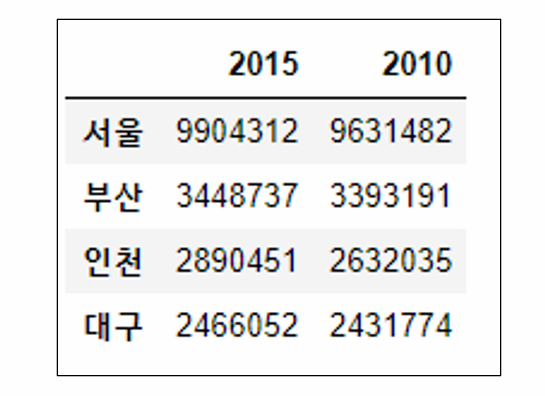

In [234]:
#실습
data = [
    [9904312, 9631482],
    [3448737, 3393191],
    [2890451, 2632035],
    [2466052, 2431774]
]
ind = ['서울', '부산', '인천', '대구']
col = [2015, 2010]# -> ['2015','2010'] 둘다 가능하다.
df3 = pd.DataFrame(data, index = ind, columns = col)
df3
#전치를 활용하기
#T ->> 데이터 프레임의 속성 ->>>> 데이터 프레임에서만 적용이 된다.
#transpose() -> 전치를 할수있다면 어디든지 활용 가능함!(함수라서!!!)
df2 = df2.T #출력만 될뿐 저장이 되지 않기 때문에 변수에 담아야한다.
df2


,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [235]:
#df2[0]#안됨???
df2[0:4]

,2015,2010
서울,9904312,9631482
부산,3448737,3393191
인천,2890451,2632035
대구,2466052,2431774


In [236]:
#데이터 프레임 정보 확인
#값 확인 -> values
#인덱스 확인 -> index
#컬럼 확인 ->columns
print(df2.values)
print(df.index)
print(df.columns)

[[9904312 9631482]
 [3448737 3393191]
 [2890451 2632035]
 [2466052 2431774]]
Index(['서울', '부산', '인천', '대구'], dtype='object')
Index(['2015', '2010'], dtype='object')


In [237]:
#데이터프레임에 값 추가하기
#컬럼을 기준으로 값을 추가 할 수 있다.
#추가될 컬럼을 먼저 지정해준다
df2['2005'] = [9762546,3512547,2517680,2456016]
df2
#데이터프레임의 값 수정하기
df2['2005'] = [9762546,3512547,2517680,2450000] # 수정하고 싶은 컬럼의 값을 수정하면 끝!

# 데이터프레임에서 인뎅싱과 슬라이싱
- 인덱스를 기준으로 삼거나 컬럼을 기준으로 삼을 수 있고 둘다 기준으로 삼을 수 있다.

In [238]:
#컬럼으로 인덱싱하기
df2['2010'] # 하나의 컬럼을 인덱싱 하면 출력시 시리즈로 출력이 된다.
df2[['2015','2005']] #리스트를 사용하여 인덱싱하면 데이트프레임으로 출력된다.
df2[['2015']] 
# 리스트를 사용하여 하나의 컬럼만 인덱싱하면 데이트프레임으로 출력된다. 
# -> 한줄만 출력이 되면 무조건 시리즈 형식으로 나온다!!!!
# -> 리스트 형태인 대괄호로 감싸주면 데이터 프레임 형태로 출력이 된다.

,2015
서울,9904312
부산,3448737
인천,2890451
대구,2466052


In [239]:
#인덱스를 기준으로 하는 슬라이싱
df2[0:2] #인덱스 번호를 통한 슬라이싱
df2['서울' : '부산'] #인덱스 이름을 통한 슬라이싱

,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547


In [240]:
#인덱서 = 인덱싱과 슬라이싱을 같이 하는것 
#iloc : 인덱스의 번호를 사용
#loc : 지정해준 인덱스의 이름을 사용

In [241]:
#loc[index,columns]
df2.loc['서울':'부산', '2015':'2010']#데이터프레임형태로 나옴 -> 부산을 지우면 한줄로 나오기 때문에 리스트로 나온다.
# df2.loc['서울':'부산', ['2015']] #한줄만 출력이 되면 시리즈 형태로 나옴 -> 데이터프레임으로 바꿀려면 리스트로 바꾸면됨
# df2.loc["서울",['2015']] #데이터프레임형태로 출력해보기!
df2.loc["서울":'서울',['2015']]

,2015
서울,9904312


In [242]:
#iloc[]
df2.iloc[0:1,0:2]

,2015,2010
서울,9904312,9631482


In [243]:
#데이터프레임에서 boolean형 인덱싱 사용하기 -> 인덱서 사용하기!!!
#2010년 인구가 250000만 이상의 데이터 출력
df2
bol = df2.loc[:,'2010']>=2500000
print(bol)
df2.loc[bol, : ]
#2010년만 데이터 프레임으로 가져오기
# pop = df2.loc[bol, : ]
# pop[['2010']]

서울     True
부산     True
인천     True
대구    False
Name: 2010, dtype: bool


,2015,2010,2005
서울,9904312,9631482,9762546
부산,3448737,3393191,3512547
인천,2890451,2632035,2517680


In [244]:
#csv 파일 불러오기
# read_csv()
pn = pd.read_csv('population_number.csv', encoding = 'euc-kr', index_col = '도시')
#특정 컬럼 인덱스로 만들기
#index_col = 컬럼이름
pn

,지역,2015,2010,2005,2000
도시,,,,,
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437
인천,수도권,2890451,2632035.0,NaN,2466338
대구,경상권,2466052,2431774.0,2456016.0,2473990


In [245]:
#값의 갯수 세기
#value_counts()
pn.loc[:,'지역'].value_counts()

수도권    2
경상권    2
Name: 지역, dtype: int64

In [246]:
#값 정렬
#sort_values() : 값을 기준으로 정렬
pn.loc[:,'2010'].sort_values() # 기본값은 True -> 오름차순으로 정렬된다.

도시
대구    2431774.0
인천    2632035.0
서울    9631482.0
부산          NaN
Name: 2010, dtype: float64

In [247]:
#내림차순 정렬
pn.loc[:,'2010'].sort_values(ascending = False)

도시
서울    9631482.0
인천    2632035.0
대구    2431774.0
부산          NaN
Name: 2010, dtype: float64

In [248]:
#by : 기준을 정해서 정렬( 기준을 여러개 지정할 수 있다)
pn.sort_values(by = '2010')
pn.sort_values(by = ['지역','2010']) #먼저 적은 기준이 적용되고 같은 데이터가 있으면 적용이 된다
#(여기서는 수도권이 같아서 수도권내에서 2010년도가 정렬이 된다.)

,지역,2015,2010,2005,2000
도시,,,,,
대구,경상권,2466052,2431774.0,2456016.0,2473990
부산,경상권,3448737,NaN,NaN,3655437
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972


In [249]:
#인덱스 값을 기준으로 정렬
pn.sort_index(ascending = False) #가나다 순으로 정렬!

,지역,2015,2010,2005,2000
도시,,,,,
인천,수도권,2890451,2632035.0,NaN,2466338
서울,수도권,9904312,9631482.0,9762546.0,9853972
부산,경상권,3448737,NaN,NaN,3655437
대구,경상권,2466052,2431774.0,2456016.0,2473990


In [250]:
#원하는 지역만 가져오기(boolean으로 가져오기)
pn.loc[pn.loc[:,'지역']=="수도권","2015"]
# pop[["2015"]] -> 변수를 주고 가져오는 방법

도시
서울    9904312
인천    2890451
Name: 2015, dtype: int64

In [251]:
#실습
score = pd.read_csv('score.csv', encoding = 'euc-kr', index_col = '과목')
score

,1반,2반,3반,4반
과목,,,,
수학,45,44,73,39
영어,76,92,45,69
국어,47,92,45,69
사회,92,81,85,40
과학,11,79,47,26


In [252]:
#학급별 과목 점수 총계
score.sum() #열방향(세로)으로 계산 해준다!

1반    271
2반    388
3반    295
4반    243
dtype: int64

In [253]:
#출력한 점수를 순위에 맞게 출력(큰반위 위로!)
score.sum().sort_values(ascending = False)

2반    388
3반    295
1반    271
4반    243
dtype: int64

In [254]:
#과목별 점수 총계
score.sum(axis = 1)
#axis = 0 이면 기준이 열(세로,column)!, 1이면 기준이 행(가로,index)!!

과목
수학    201
영어    282
국어    253
사회    298
과학    163
dtype: int64

In [255]:
#합계 컬럼 추가
# score["합계"] = score.sum(axis = 1)
score["합계"] = score.loc[:,:'4반'].sum(axis = 1) # 값이 계속 증가되는걸 막기위해!
score

,1반,2반,3반,4반,합계
과목,,,,,
수학,45,44,73,39,201
영어,76,92,45,69,282
국어,47,92,45,69,253
사회,92,81,85,40,298
과학,11,79,47,26,163


In [256]:
#평균 컬럼 추가하기
score['평균'] = score.loc[:,:'4반'].mean(axis =1 )
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45,44,73,39,201,50.25
영어,76,92,45,69,282,70.50
국어,47,92,45,69,253,63.25
사회,92,81,85,40,298,74.50
과학,11,79,47,26,163,40.75


In [257]:
#인덱스 추가
#반 평균 구하기
score.loc['반평균'] = score.mean()
score

,1반,2반,3반,4반,합계,평균
과목,,,,,,
수학,45.0,44.0,73.0,39.0,201.0,50.25
영어,76.0,92.0,45.0,69.0,282.0,70.50
국어,47.0,92.0,45.0,69.0,253.0,63.25
사회,92.0,81.0,85.0,40.0,298.0,74.50
과학,11.0,79.0,47.0,26.0,163.0,40.75
반평균,54.2,77.6,59.0,48.6,239.4,59.85


In [273]:
#가장 큰값 구하기
#max()
max_score = score.loc[:'과학',:'4반'].max(axis=1)
max_score

과목
수학    73.0
영어    92.0
국어    92.0
사회    92.0
과학    79.0
dtype: float64

In [274]:
#가장 작은 값 구하기
#min()
min_score = score.loc[:'과학',:'4반'].min(axis=1)
min_score

과목
수학    39.0
영어    45.0
국어    45.0
사회    40.0
과학    11.0
dtype: float64

In [282]:
#과목별로 가장 큰값과 가장 작은값의 차이를 구하자
max_score - min_score

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

In [283]:
#apply(함수, axis)
#행이나 열 단위로 복잡한 처리를 하고 싶을 때 사용
#적용시킬 데이터에 행 / 열 단위로 함수를 적용시켜줌!

In [288]:
#함수 만드는 키워드
#def
def max_min(x) :
    return x.max()-x.min()

In [289]:
score.loc[:"과학",:"4반"].apply(max_min , axis = 1)
#axis 를 1을 주었기 때문에 수학 한줄에서 함수 작동하고 "과학"까지 반복한다
#apply에서는 매개변수를 적지 않는다
#-> 매개변수 값이 어플라이가 추출한 행이나 열이 들어가기 때문이다

과목
수학    34.0
영어    47.0
국어    47.0
사회    52.0
과학    68.0
dtype: float64

In [ ]:
#결측치를 채우는 함수
#결측치 : 값이 없는 갑(null,nan)
#fillna()

In [292]:
data_dic = {'A' : [1,3,3,4,4,], 'B' : [1,2,2,3,3], 'C' : [1,2,4,4,5]}
df = pd.DataFrame(data_dic)
df

,A,B,C
0,1,1,1
1,3,2,2
2,3,2,4
3,4,3,4
4,4,3,5


In [300]:
df1 = df.apply(pd.value_counts)
df1
#A에 는 1이 한개있고 2가 없고 3은 2개 4는2개 5는 없고 .......을 표현

,A,B,C
1,1.0,1.0,1.0
2,NaN,2.0,1.0
3,2.0,2.0,NaN
4,2.0,NaN,2.0
5,NaN,NaN,1.0


In [298]:
df['A'].value_counts()
#3이 두개, 4가 2개, 1이 한개

3    2
4    2
1    1
Name: A, dtype: int64

In [302]:
df1 = df1.fillna(100) #값을 출력하고 저장하지 않음
df1

,A,B,C
1,1.0,1.0,1.0
2,100.0,2.0,1.0
3,2.0,2.0,100.0
4,2.0,100.0,2.0
5,100.0,100.0,1.0


In [ ]:
#카테고리 데이터 만들기
#cut(데이터, 기준, 라벨)

In [305]:
ages = [0,2,10,21,23,37,31,61,20,41,32,100]
bins = [0,15,25,35,60,99] #구분한 기준이되는 데이터(0초과 15이하, 15초과 25이하 ......)
labels = ['미성년자','청년','중년','장년','노년']

In [306]:
pd.cut(x = ages, bins = bins, labels = labels)

[NaN, '미성년자', '미성년자', '청년', '청년', ..., '노년', '청년', '장년', '중년', NaN]
Length: 12
Categories (5, object): ['미성년자' < '청년' < '중년' < '장년' < '노년']

In [307]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])


In [313]:
#데이터 프레임 합치기
#concat() -> 저장이 안되서 변수에 담아야한다.
pd.concat([df1,df2,df3], axis = 0)
pd.concat([df1,df2,df3], axis = 1)

,A,B,C,D,A,B,C,D,A,B,C,D
0,A0,B0,C0,D0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A2,B2,C2,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,A3,B3,C3,D3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,A4,B4,C4,D4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,A5,B5,C5,D5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,A6,B6,C6,D6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,A7,B7,C7,D7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A8,B8,C8,D8
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A9,B9,C9,D9


In [314]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

In [315]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [316]:
pd.concat([df1,df4], axis = 1)
# axis =1 은 인덱스를 기준으로 합치게 된다
# axis = 0 은 컬럼을 기준으로 합치게 된다.
#  합칠때 기준이 되는 컬럼이나 인덱스가 공통된다면 깔끔하게 합쳐진다!
# 공통되는 부분이 없다면 nan이 뜬다.

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [317]:
#같은 인덱스를 가지고 있는 값만 출력하기
#join = 'inner'
pd.concat([df1,df4], axis = 1, join = 'inner')

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [319]:
#컬럼 초기화
pd.concat([df1,df4], axis = 1, ignore_index = True)

,0,1,2,3,4,5,6
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [320]:
#인덱스 초기화
pd.concat([df1,df4], axis = 0, ignore_index = True)

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [321]:
#value를 기준으로 합치기
df5 = pd.DataFrame({'key': ['K0','K2','K3','K4'],
'A':['A0','A1','A2','A3'],
'B':['B0','B1','B2','B3']})


df6 = pd.DataFrame({'key': ['K0','K1','K2','K3'],
'C':['C0','C1','C2','C3'],
'D':['D0','D1','D2','D3']})


In [324]:
#merge(합칠 데이터, 합칠 데이터, on = '공통된 컬럼') -> 데이터 두개만 합칠수있다!
#데이터를 기준으로 데이터프레임을 합친다.
pd.merge(df5,df6,on = 'key') # 기본값으로 값이 같을 때만 출력한다.
#기본값 -> how = inner

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3


In [325]:
#기준이 달라도 모든 데이터 출력하기
pd.merge(df5,df6,on = 'key', how ='outer')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A1,B1,C2,D2
2,K3,A2,B2,C3,D3
3,K4,A3,B3,NaN,NaN
4,K1,NaN,NaN,C1,D1


In [327]:
#how 속성 : left,right
pd.merge(df5,df6,on = 'key', how ='right')
#left : 입력한 합칠 데이터의 데이터의 왼쪽을 기준으로 출력
#right : 입력한 합칠 데이터의  데이터의 오른쪽을 기준으로 출력

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A1,B1,C2,D2
3,K3,A2,B2,C3,D3
